# Ερώτημα 1

### Να κατεβάσετε από το σύνδεσμο https://finance.yahoo.com/quote/IBM/history?p=IBM τις τιμές μετοχών της IBM για το χρονικό διάστημα από 03/01/1962 έως σήμερα.
------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading csv file 
df = pd.read_csv("IBM.csv",sep=",")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200


# Ερώτημα 2

### Βρείτε την εκατοστιαία ημερήσια διακύμανση της μετοχής :
### 100*(Τιμή Κλεισίματος –Τιμή Ανοίγματος) / Τιμή Ανοίγματος 
### και να την προσθέσετε ως καινούργια στήλη σε ένα νέο excel που θα κατασκευάσετε και θα περιέχει το σύνολο των υπολοίπων στηλών του αρχείου που κατεβάσατε

-------------------------------------------------------------------------------------------------------------------------------


In [3]:
df["Day_Var"] = ((df["Close"] - df["Open"]) / df["Open"])* 100

writer = pd.ExcelWriter('New Data.xlsx')
df.to_excel(writer, sheet_name = 'Day Var' , index = False)
writer.save()

In [4]:
pd.read_excel('New Data.xlsx', index_col=0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Var
0,1962-01-03,7.626667,7.693333,7.626667,7.693333,1.867095,288000,0.874117
1,1962-01-04,7.693333,7.693333,7.613333,7.616667,1.848488,256000,-0.996525
2,1962-01-05,7.606667,7.606667,7.453333,7.466667,1.812086,363200,-1.840491
3,1962-01-08,7.460000,7.460000,7.266667,7.326667,1.778110,544000,-1.787306
4,1962-01-09,7.360000,7.506667,7.360000,7.413333,1.799143,491200,0.724633


# Ερώτημα 3

### Να κατασκευάσετε ένα ιστόγραμμα το οποίο στον οριζόντιο άξονα θα έχει την εκατοστιαία ημερήσια διακύμανση (βήμα = 0.1%)και στον κατακόρυφο το πλήθος των ημερών κατά τις οποίες παρατηρήθηκε η παραπάνω διακύμανση. Στο ίδιο διάγραμμα να απεικονίζονται οι μέγιστες και ελάχιστες τιμές διακύμανσης και η τελευταία ημερομηνία στις οποίες παρατηρήθηκαν αυτές.

In [5]:
Date = df['Date']
Date

0        1962-01-03
1        1962-01-04
2        1962-01-05
3        1962-01-08
4        1962-01-09
            ...    
14831    2020-12-02
14832    2020-12-03
14833    2020-12-04
14834    2020-12-07
14835    2020-12-08
Name: Date, Length: 14836, dtype: object

In [6]:
Day_Var = df['Day_Var']
Day_Var

0        0.874117
1       -0.996525
2       -1.840491
3       -1.787306
4        0.724633
           ...   
14831    1.440786
14832   -0.442979
14833    2.605466
14834   -1.415132
14835    0.311203
Name: Day_Var, Length: 14836, dtype: float64

In [7]:
df1 = pd.DataFrame({'Date':Date , 'Day_Var': Day_Var})
df1


,Date,Day_Var
0,1962-01-03,0.874117
1,1962-01-04,-0.996525
2,1962-01-05,-1.840491
3,1962-01-08,-1.787306
4,1962-01-09,0.724633
...,...,...
14831,2020-12-02,1.440786
14832,2020-12-03,-0.442979
14833,2020-12-04,2.605466
14834,2020-12-07,-1.415132


In [8]:
count = df1.groupby('Day_Var').count()
count

,Date
Day_Var,
-23.518519,1
-9.850107,1
-9.737418,1
-9.068009,1
-8.434959,1
...,...
7.942708,1
8.490566,1
8.986936,1


In [9]:
print(count.max())

Date    517
dtype: int64


             Date   Day_Var
0      1962-01-03  0.874117
1      1962-01-04 -0.996525
2      1962-01-05 -1.840491
3      1962-01-08 -1.787306
4      1962-01-09  0.724633
...           ...       ...
14831  2020-12-02  1.440786
14832  2020-12-03 -0.442979
14833  2020-12-04  2.605466
14834  2020-12-07 -1.415132
14835  2020-12-08  0.311203

[14836 rows x 2 columns]
            Date
Day_Var         
-23.518519     1
-9.850107      1
-9.737418      1
-9.068009      1
-8.434959      1
...          ...
 7.942708      1
 8.490566      1
 8.986936      1
 11.657303     1
 12.985075     1

[13022 rows x 1 columns]

---------------------------------------

 Day Counter / var :  Date    517
dtype: int64

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :['2001-01-03', 12.985074626865673]

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :['1987-10-19', -23.51851851851852]


Text(20, 200, 'Last Day MaxVar:2001-01-03\n\nLast Day MinVar:1987-10-19')

<Figure size 1224x360 with 0 Axes>

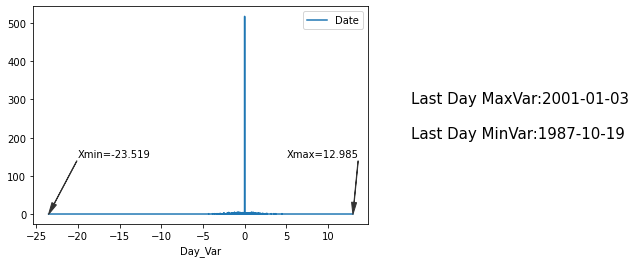

In [10]:
Date = df1['Date']  
Day_Var = df1['Day_Var']    
    
df1 = pd.DataFrame({'Date':Date , 'Day_Var': Day_Var})
print(df1)
    
count = df1.groupby('Day_Var').count()
print(count)
print("\n---------------------------------------\n\n Day Counter / var : ",count.max())

plt.figure(figsize=(17,5))
plot = df1.groupby('Day_Var').count().plot()
plot
bins = (df1['Day_Var'].max() - df1['Day_Var'].min()) * 10
bins = int(bins)
        
xmin,xmax = plt.xlim()
xmax = df1["Day_Var"].max()
xmin = df1["Day_Var"].min()
max_day = list(df1.iloc[df1['Day_Var'].argmax()])
min_day = list(df1.iloc[df1['Day_Var'].argmin()])

print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')

plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(5, 150), fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-20, 150), fontsize=10,\
             arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})

max_day = list(df1.iloc[df1['Day_Var'].argmax()])
min_day = list(df1.iloc[df1['Day_Var'].argmin()])
plt.text(20,200,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=15)

# Ερώτημα 4

### Να κατασκευάσετε ένα μοντέλο που αντιστοιχεί στην παραπάνω κατανομή και να απεικονίσετε την κατανομή του μοντέλου στο ίδιο ιστόγραμμα. Διαλέξτε την καταλληλότερη κατανομή για τα δεδομένα σας.


 mean = 0.018054210248197623 & std = 1.3374221601476104

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :['2001-01-03', 83.75, 95.0, 83.75, 94.625, 59.501056999999996, 12769900, 12.985074626865673]

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :['1987-10-19', 33.75, 34.5, 25.0, 25.8125, 11.62007, 25497600, -23.51851851851852]


Text(-20, 0.4, 'Last Date MaxVar:2001-01-03\n\nLast Date of MinVar:1987-10-19')

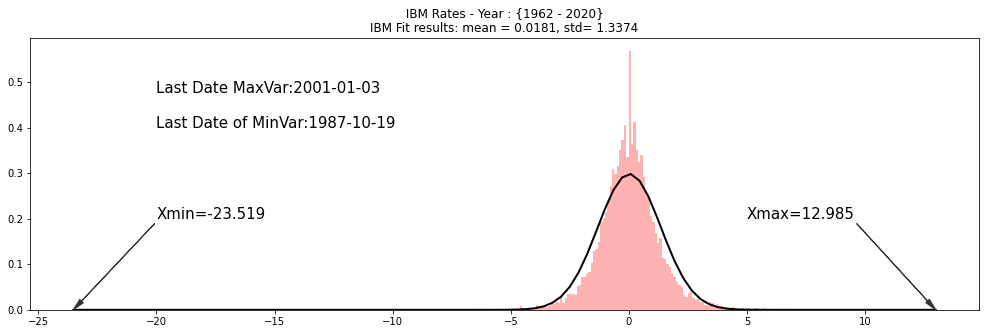

In [11]:
mean, std= norm.fit(Day_Var)
print(f'\n mean = {mean} & std = {std}')
    
mean, std= norm.fit(df1["Day_Var"])
plt.figure(figsize=(17,5))
plt.hist(df['Day_Var'], bins=bins, density=True, alpha=0.3, color='r',linewidth=4)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)
title = " IBM Rates - Year : {1962 - 2020} \nIBM Fit results: mean = %.4f, std= %.4f" % (mean, std)
#plt.savefig(' histogram - 2.png', dpi=300)
plt.title(title)

xmin,xmax = plt.xlim()
xmax = df["Day_Var"].max()
xmin = df["Day_Var"].min()
max_day = list(df.iloc[df['Day_Var'].argmax()])
min_day = list(df.iloc[df['Day_Var'].argmin()])

print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')

plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(5, 0.2), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})
plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-20, 0.2), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})


max_day = list(df.iloc[df['Day_Var'].argmax()])
min_day = list(df.iloc[df['Day_Var'].argmin()])
plt.text(-20,0.4,"Last Date MaxVar:" + max_day[0] +"\n" + "\nLast Date of MinVar:"+ min_day[0],fontsize=15)

# Ερώτημα 5

### Αυτοματοποιήστε την παραπάνω διαδικασία ώστε το πρόγραμμα σας να δέχεται σαν είσοδο το όνομα μιας μετοχής και να πραγματοποιεί αυτόματα την παραπάνω αναζήτηση στο δίκτυο και την ανάλυση (μπορείτε να χρησιμοποιήσετε οποιαδήποτε έγκυρη δικτυακή πηγή για τις τιμές των μετοχών)
-------------------------------------------------------------------------------------------------------------------------------

#### We will download IBM Stock Rates from YAHOO for the Years: {1980 - 2020} 
-------------------------------------------------------------------------------------------------------------------------------

In [12]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [13]:
start = datetime.datetime(1980,1,1)
stop = datetime.datetime(2020,1,1)

print("\n---------------------------------------------\n\
*** Please fill find below IBM or S&P500 Stock Rates {1980 - 2020}\
\n---------------------------------------------\n ")

Stock_name = input("Insert a Stock - Name :")

print("\n---------------------------------------------\n\
*** Please wait few sec for the downloading of the data\
\n---------------------------------------------\n ")

while Stock_name != 'IBM'and Stock_name != 'SPY' :
    Stock_name = input("Insert a stock :")

if  Stock_name == 'IBM':
   
    df1 = web.DataReader("IBM",'yahoo',start,stop)
    df1.to_csv('IBM - Rates.csv')
    print("\n------- IBM - Rates.csv has been downloaded correctly ! -------")
    
     
        
    df1 = pd.read_csv('IBM - Rates.csv',sep=",")
    df1.head() 
    
    
        
    df1["Day_Var"] = ((df1["Close"] - df1["Open"]) / df1["Open"])* 100
    # df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100

    writer = pd.ExcelWriter('New Data IBM.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data IBM.xlsx', index_col=0)
    df1.head()

elif  Stock_name == 'SPY':
   
    df1 = web.DataReader("SPY",'yahoo',start,stop)
    df1.to_csv('SPY - Rates.csv')
    print("\n SPY - Rates.csv has been downloaded correctly !!!")
    
     
        
    df1 = pd.read_csv('SPY - Rates.csv',sep=",")
    df1.head() 
    
    
        
    df1["Day_Var"] = ((df1["Close"] - df1["Open"]) / df1["Open"])* 100
    # df1["Day_Var"] = ((df1["Open"] - df1["Close"]) / df1["Open"])* 100

    writer = pd.ExcelWriter('New Data SPY.xlsx')
    df1.to_excel(writer, sheet_name = 'Day Var' , index = False)
    writer.save()    
     
    pd.read_excel('New Data SPY.xlsx', index_col=0)
    df1.head()        


---------------------------------------------
*** Please fill find below IBM or S&P500 Stock Rates {1980 - 2020}
---------------------------------------------
 
Insert a Stock - Name :SPY

---------------------------------------------
*** Please wait few sec for the downloading of the data
---------------------------------------------
 

 SPY - Rates.csv has been downloaded correctly !!!


            Date   Day_Var
0     1993-01-29 -0.071073
1     1993-02-01  0.639659
2     1993-02-02  0.282686
3     1993-02-03  0.914849
4     1993-02-04  0.069493
...          ...       ...
6775  2019-12-24 -0.074654
6776  2019-12-26  0.401060
6777  2019-12-27 -0.271825
6778  2019-12-30 -0.579045
6779  2019-12-31  0.414934

[6780 rows x 2 columns]
           Date
Day_Var        
-8.990574     1
-7.633904     1
-7.469880     1
-6.513347     1
-6.374015     1
...         ...
 5.851621     1
 7.350591     1
 7.968462     1
 8.434666     1
 9.296296     1

[6656 rows x 1 columns]

---------------------------------------

 Day Counter / var :  Date    82
dtype: int64

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :['1997-10-28', 9.296296296296298]

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :['2008-10-09', -8.990574337369564]


Text(0.5, 1.0, 'Histogram')

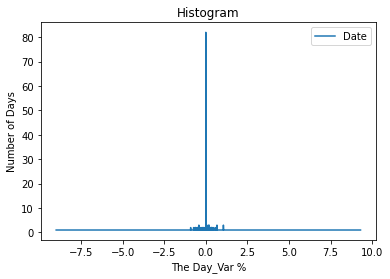

In [14]:
 
    Date = df1['Date']  
    Day_Var = df1['Day_Var']    
    
    df = pd.DataFrame({'Date':Date , 'Day_Var': Day_Var})
    print(df)
    
    count = df.groupby('Day_Var').count()
    print(count)
    print("\n---------------------------------------\n\n Day Counter / var : ",count.max())
    
      
    plot = df.groupby('Day_Var').count().plot()
    plot
    bins = (df['Day_Var'].max() - df['Day_Var'].min()) * 10
    
    bins = int(bins)
        
    xmin,xmax = plt.xlim()
    xmax = df["Day_Var"].max()
    xmin = df["Day_Var"].min()
    max_day = list(df.iloc[df['Day_Var'].argmax()])
    min_day = list(df.iloc[df['Day_Var'].argmin()])

    print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
    print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')
     
#     plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(5, 150), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})
#     plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-20, 150), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})
    
    

    
    max_day = list(df.iloc[df['Day_Var'].argmax()])
    min_day = list(df.iloc[df['Day_Var'].argmin()])
#     plt.text(-13,230,"Last Date MaxVar:" + max_day[0] +"\n" + "\nLast Date of MinVar:"+ min_day[0],fontsize=15)
    plt.ylabel('Number of Days')
    plt.xlabel('The Day_Var %')
    plt.title('Histogram')



 mean = 0.00270616970285257 & std = 0.9615378036160112

 H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :['1997-10-28', 9.296296296296298]

 H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :['2008-10-09', -8.990574337369564]


Text(5, 0.4, 'Last Day MaxVar:1997-10-28\n\nLast Day MinVar:2008-10-09')

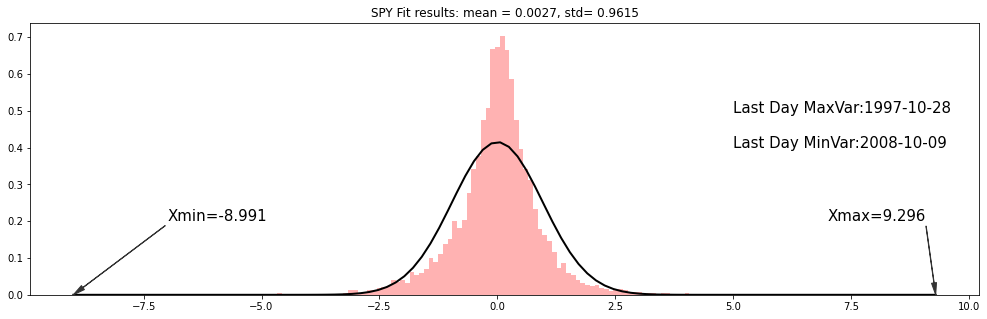

In [15]:
    # Normal Distribution Plot    

    mean, std= norm.fit(Day_Var)
    print(f'\n mean = {mean} & std = {std}')
    
    mean, std= norm.fit(df1["Day_Var"])
    plt.figure(figsize=(17,5))
    plt.hist(df['Day_Var'], bins=bins, density=True, alpha=0.3, color='r',linewidth=4)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = Stock_name + " Fit results: mean = %.4f, std= %.4f" % (mean, std)
    #plt.savefig(' histogram - 2.png', dpi=300)
    plt.title(title)

    xmin,xmax = plt.xlim()
    xmax = df["Day_Var"].max()
    xmin = df["Day_Var"].min()
    max_day = list(df.iloc[df['Day_Var'].argmax()])
    min_day = list(df.iloc[df['Day_Var'].argmin()])

    print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μεγαλύτερη διακύμαση είχε ημ/νία και τιμή :{max_day}')
    print(f'\n H τελευταία μέρα που πουρουσιάστηκε η μικρότερη διακύμαση είχε ημ/νία και τιμή :{min_day}')

    plt.annotate(f'Xmax={round(xmax,3)}', xy=(xmax,0), xytext=(7, 0.2), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})
    plt.annotate(f'Xmin={round(xmin,3)}', xy=(xmin,0), xytext=(-7, 0.2), fontsize=15, arrowprops={'width':0.3,'headwidth':5,'color':'#333333'})


    max_day = list(df.iloc[df['Day_Var'].argmax()])
    min_day = list(df.iloc[df['Day_Var'].argmin()])
    plt.text(5,0.4,"Last Day MaxVar:" + max_day[0] +"\n" + "\nLast Day MinVar:"+ min_day[0],fontsize=15)
    